In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gmean
import matplotlib.ticker as mtick
import matplotlib.dates as dates

In [2]:
d = pd.concat([
    pd.read_csv(f"~/Documents/case-study-runtimes/{n}.csv",
                names=["name", "actual", "expected", "duration", "browser", "subscript"])
    for n in [1, 5, 10, 50, 100, 500]])
d

name  actual expected    duration  browser  subscript
0    angular-dart  passed   failed   13.529671  firefox          1
1    angular-dart  passed   failed   13.033739  firefox          1
2    angular-dart  passed   failed   13.221069  firefox          1
3    angular-dart  passed   failed   13.623472  firefox          1
4    angular-dart  passed   failed   13.258372  firefox          1
..            ...     ...      ...         ...      ...        ...
425           vue  passed   passed  156.638816  firefox        500
426           vue  passed   passed  185.691179  firefox        500
427           vue  passed   passed  178.570207  firefox        500
428           vue  passed   passed  171.199023  firefox        500
429           vue  passed   passed  187.319319  firefox        500

[2579 rows x 6 columns]

In [3]:
expected_failed = d[d["expected"] == "failed"]
false_positives = expected_failed[expected_failed["actual"] == "passed"]


false_positive_rates = pd.DataFrame()
false_positive_rates["rate"] = false_positives.groupby("subscript")["actual"].count() / expected_failed.groupby("subscript")["actual"].count()
false_positive_rates

rate
subscript          
1          1.000000
5          0.895455
10         0.645455
50         0.304545
100        0.213636
500        0.081818

In [4]:
expected_passed = d[d["expected"] == "passed"]

x = pd.DataFrame()
x["gmean"] = expected_passed.groupby("subscript")["duration"].apply(gmean)
x["stddev"] = expected_passed.groupby("subscript")["duration"].std()
x

gmean     stddev
subscript                       
1           12.841619   0.443562
5           13.220053   0.538000
10          14.396001   1.033888
50          26.395305   3.866946
100         40.994505   7.442214
500        149.133493  43.553283

In [5]:
x["rate"] = false_positive_rates["rate"]
x.to_csv("results.csv")
x

gmean     stddev      rate
subscript                                 
1           12.841619   0.443562  1.000000
5           13.220053   0.538000  0.895455
10          14.396001   1.033888  0.645455
50          26.395305   3.866946  0.304545
100         40.994505   7.442214  0.213636
500        149.133493  43.553283  0.081818

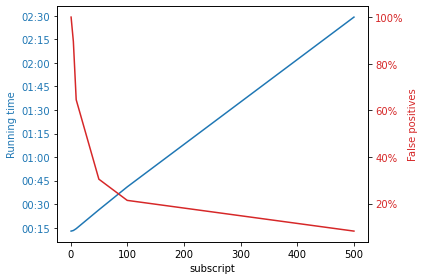

In [60]:

def format_duration(x, pos):
    hours = int(x//3600)
    minutes = int((x%3600)//60)
    seconds = int(x%60)
    return "{:02d}:{:02d}".format(minutes, seconds)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Subscript')
ax1.set_ylabel('Running time', color=color)
x.gmean.plot(ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.yaxis.set_major_locator(mtick.MultipleLocator(base=15))
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(format_duration))

ax2 = ax1.twinx()

ax2.xaxis.set_major_locator(mtick.MultipleLocator(base=100))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

color = 'tab:red'
ax2.set_ylabel('False positives', color=color)
x.rate.plot(ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

fig.savefig("plot.ps")